# CTF Template

Welcome to the DEFCON AI Village Capture-the-Flag (CTF). Feel free to copy this notebook and use it as the foundation for your submissions.

## Intro

Help Henry Hacker get to Homecoming! In this series of challenges, you'll be interacting with various machine learning challenges. You're welcome to use this notebook as a template, but can also use any other resources. `Submission Helper` code is just there to show you how to interact with a challenge. You're encouraged to write your own code. There are no fake flags, so if you're returned a 256 character-long string, you found it! Collect those flags, add them next to their corresponding challenge in `solution.csv` (provided) and submit them to the scoreboard. We've provided an `add_flag()` function to help with this. There's no limit to how many times you try the challenges, but you can only submit `solution.csv` to the scoreboard 50 times per day. 

CTF's are inherently puzzles that are intended to challenge you and help you learn new things. Sometimes they may be a little ambiguous or misleading. That's part of the challenge! However, if you feel like a challenge or piece of infrastructure isn't working correctly, contact the organizers through the Kaggle discussion board or the discord channel.

In [38]:
# We're just importing some stuff to make sure the challenges and helper code works.
# Feel free to import anything else you need (or solve in a different language), but if you overwrite these, provided code may not work.

import pandas as pd
import numpy as np
import os
import requests
from IPython.display import Image as Ima
from IPython.display import clear_output, display
from PIL import Image as Im
from torch.utils.data import Dataset, DataLoader
import torch
import joblib
import matplotlib.pyplot as plt
import json
import base64
import shutil
import warnings
import time
warnings.filterwarnings("ignore")

dir_home_name = "/Users/reno/Documents/REPOS/Kaggle/DEFCON AI Village Capture-the-Flag (CTF)"
dir_name = f"{dir_home_name}/ai-village-ctf"

# Input data files are available in the read-only "../input/" directory
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [24]:
# A helper function for tracking flags. You could do it yourself, but why?

def add_flag(challenge_id: str, flag: str) -> str:
    try:
        submission_path = f"{dir_home_name}/submission.csv"
        template_path = f"{dir_name}/submission.csv"
        if not os.path.isfile(submission_path) :
            shutil.copyfile(template_path, submission_path)
        flags = pd.read_csv(submission_path, index_col="challenge_id")
        valid = flags.index.to_list()
        if challenge_id in valid:
            flags.at[challenge_id] = flag
            flags.to_csv(submission_path)
            print("Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day")
        else:
            print("Invalid challenge_id")
    except:
        print("We had trouble saving that flag. Keep a copy of it and contact the CTF organizers.")

# HOTDOG (id: hotdog) -- 200 Points

### Scenario

This is Chester. He's heard of Hotdog/Not Hotdog, but really wants to be classified as a hot-dog (get it?).

### Objective

Help Chester classify as a hotdog.

In [1]:
file_name = f'{dir_name}/hotdog/IMG_7894_1.jpg'
Ima(filename=file_name)

NameError: name 'dir_name' is not defined

In [17]:
# Submission Helper

IMAGE_DIMS = (224, 224)

img = Im.open(file_name)
img = img.resize(IMAGE_DIMS)
img_bytes = img.tobytes()
b64_img_bytes = base64.urlsafe_b64encode(img_bytes)

try:
    r = requests.post("https://hotdog.fly.dev/score", data=json.dumps({"input": b64_img_bytes.decode()}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

{"message": "JNODTBAR3R1EY4}6UMSKLFOUFZ88IGZ6IJVOAC43GLTPOSVAZWMHC0LVDOX7CZRS8N1NCXYTYGZEYOYVU1LSFO6Z63GTJTMIODWAT5WNA2DWG3GV1B7E4FT9S1N{27AO"}


In [36]:
add_flag("hotdog", "JNODTBAR3R1EY4}6UMSKLFOUFZ88IGZ6IJVOAC43GLTPOSVAZWMHC0LVDOX7CZRS8N1NCXYTYGZEYOYVU1LSFO6Z63GTJTMIODWAT5WNA2DWG3GV1B7E4FT9S1N{27AO")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


# Math

This series of "Math" challenges is designed to introduce the concepts of dimensionality.

Data is often represented in a high dimensional space, but is actually several intrinsically low dimensional components that can be diagnosed. Intrinsic low-dimensionailty is incredibly important to machine learning because many ML algorithms rely on it. Medical EKG data is as single intrinsically 2 dimensional component, despite often being represented as 100 dimensions or more. The classic MNIST dataset is several components of 8-10 dimensions, depending on the digits class, despite being represented in 784 dimensions. The 4 math challenges are focused on this problem. **If you need a hint, ask Sven at the Art Booth.**

# Math Challenge 1 (id: math_1) -- 100 Points

How many clusters are in the clusters1.npy, clusters2.npy, and clusters3.npy? The key is the number of clusters in order, with no spaces. These files are available in the input directory under `math`.

In [96]:
start=time.time()

data_array = np.load(f"{dir_name}/math/clusters3.npy")
data = pd.DataFrame(data_array)

end=time.time()

print("\nData summary:\n", data_array)
print("\nData shape:\n", data_array.shape)
print(f"\nTime to read: {round(end-start,5)} seconds.")


Data summary:
 [[ 6.36817690e+00  7.54431509e-01  5.12977355e+00  1.12920051e+00
   6.84256058e+00  7.14711954e-01 -8.29866746e+00 -2.42997958e+00
   9.06104786e+00  6.19331539e-01 -2.77043392e+00 -2.54543403e+00
   1.57579991e+00  6.72988678e-01 -8.23472520e+00]
 [-3.28339872e+00 -8.51813327e-01  6.11672951e+00 -6.55168259e+00
  -5.09301675e+00  6.15532591e+00 -6.18170990e+00  1.52349348e+00
  -2.99882439e+00  7.51371714e+00 -9.58186582e+00  3.77407405e+00
   9.30668446e+00 -8.47977496e+00 -9.35125469e+00]
 [-4.72634572e+00  1.45776419e+00  2.56464670e+00  3.74830605e+00
  -1.97937176e+00 -4.27897814e+00  2.06211655e-01  1.29460786e+01
   5.10073744e+00 -8.84517224e+00 -8.64396471e+00 -5.56774387e+00
   2.03302725e-01 -3.81806201e+00 -3.78080385e-01]
 [-4.58472387e+00  2.56232379e+00  3.07505532e+00  3.73954560e+00
  -2.22441429e+00 -4.10647654e+00 -1.41595384e+00  1.26520041e+01
   4.73093797e+00 -8.52842157e+00 -8.19976465e+00 -4.90341405e+00
   1.61409336e+00 -2.90107377e+00 -1.05

In [95]:
data.shape

(37, 15)

In [97]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,6.368177,0.754432,5.129774,1.129201,6.842561,0.714712,-8.298667,-2.429980,9.061048,0.619332,-2.770434,-2.545434,1.575800,0.672989,-8.234725
1,-3.283399,-0.851813,6.116730,-6.551683,-5.093017,6.155326,-6.181710,1.523493,-2.998824,7.513717,-9.581866,3.774074,9.306684,-8.479775,-9.351255
2,-4.726346,1.457764,2.564647,3.748306,-1.979372,-4.278978,0.206212,12.946079,5.100737,-8.845172,-8.643965,-5.567744,0.203303,-3.818062,-0.378080
3,-4.584724,2.562324,3.075055,3.739546,-2.224414,-4.106477,-1.415954,12.652004,4.730938,-8.528422,-8.199765,-4.903414,1.614093,-2.901074,-1.059218
4,-4.237074,2.375224,3.732687,4.055991,-2.244185,-4.468442,-0.380459,14.709832,4.053585,-8.552628,-9.220935,-4.874086,1.231409,-3.683110,-1.192261


In [61]:
from sklearn.cluster import KMeans

In [87]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(data)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

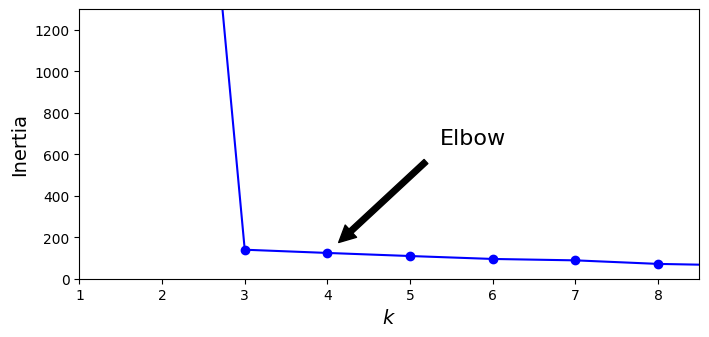

In [88]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

In [195]:
# Submission Helper

try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "math_1", "submission": "523"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is JMWR9KKH7259MTIUT8WI5MBGF9R{M7OP6WYB6BICTFLV10LKTV7L5K0V0TIAWWDL}AOEA98COH8Z4X3YDJV03UFGRV7H517I5FA7MINIIETTDNBQMYN7G9IT6WI39HE6.


In [90]:
add_flag("math_1", "8304M7MDSVVE8QN3O8H2ED0P64Q{LRJ5TKUTXHJ28M8OLN5BUA2LSC8PYTKHXI63}2GEHH5E564BT630IYO3QMFG5NYXH8P3OQA91H14JCD4AQK3SY5WSAI6YJLV3DI3")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


# Math Challenge 2 (id: math_2) -- 200 Points

What's the dimensionality of the data in first_dim1.npy, first_dim2.npy, and first_dim3.npy? The key is the number of dimensions in order, with no spaces.  These files are available in the input directory under `math`.

In [164]:
start=time.time()

data_array = np.load(f"{dir_name}/math/first_dim2.npy")
data = pd.DataFrame(data_array)

end=time.time()

#print("\nData summary:\n", data_array)
print("\nData shape:\n", data_array.shape)
print(f"\nTime to read: {round(end-start,5)} seconds.")


Data shape:
 (20, 9)

Time to read: 0.00115 seconds.


In [167]:
from sklearn.decomposition import PCA

n = 5
pca = PCA(n_components=n)
X2D = pca.fit_transform(data)
pca.explained_variance_ratio_
test = pca.explained_variance_ratio_

#iterate through test and add all values
sum = 0
for i in test:
    sum = sum + i

print(sum)
    

1.0000000000000002


In [168]:
# Submission Helper

try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "math_2", "submission": "354"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is U3NXJBG0WYJ5QQX9JPBZQJ50AL}EVIQ4YD59AA09VBTBN5PA9V02Z8FZAIXMC7KCAH8JW74VDEFCVKYKE68SCKFDZ5YH6CFSADJTEX2MQ6BMVFNVJ{342QNFASJR84G6.


In [169]:
add_flag("math_2", "U3NXJBG0WYJ5QQX9JPBZQJ50AL}EVIQ4YD59AA09VBTBN5PA9V02Z8FZAIXMC7KCAH8JW74VDEFCVKYKE68SCKFDZ5YH6CFSADJTEX2MQ6BMVFNVJ{342QNFASJR84G6")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


# Math Challenge 3 (id: math_3) -- 300 Points

What's the dimensionality of the data in second_dim1.npy, second_dim2.npy, and second_dim3.npy? The key is the number of the dimensionality in order, with no spaces.  These files are available in the input directory under `math`.

In [185]:
start=time.time()

data_array = np.load(f"{dir_name}/math/second_dim3.npy")
data = pd.DataFrame(data_array)

end=time.time()

#print("\nData summary:\n", data_array)
print("\nData shape:\n", data_array.shape)
print(f"\nTime to read: {round(end-start,5)} seconds.")


Data shape:
 (10, 10)

Time to read: 0.00216 seconds.


In [191]:
from sklearn.decomposition import PCA

n = 4
pca = PCA(n_components=n)
X2D = pca.fit_transform(data)
pca.explained_variance_ratio_
test = pca.explained_variance_ratio_

#iterate through test and add all values
sum = 0
for i in test:
    sum = sum + i

print(sum)

1.0000000000000002


In [192]:
# Submission Helper

try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "math_3", "submission": "474"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is GKQOLHF58H0C12FVDUKX4BGOY}{VAS0IAYMRQXRTL0YWYRB2L2DX57B9FMZBOES4GUANE5NCU34_FF5LH76LAJUIEFBRPFUA94AE83FATDQ8TGAUFPCZQTLL87TM6LZY.


In [194]:
add_flag("math_3", "GKQOLHF58H0C12FVDUKX4BGOY}{VAS0IAYMRQXRTL0YWYRB2L2DX57B9FMZBOES4GUANE5NCU34_FF5LH76LAJUIEFBRPFUA94AE83FATDQ8TGAUFPCZQTLL87TM6LZY")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


# Math Challenge 4 (id: math_4) -- 400 Points

What's the dimensionality of the clusters in clusters1.npy? The key is the dimensions ordered by cluster size (smallest to largest), with no spaces.  These files are available in the input directory under `math`.

In [250]:
start=time.time()

data_array = np.load(f"{dir_name}/math/clusters1.npy")
data = pd.DataFrame(data_array)

end=time.time()

print("\nData size:\n", data.size)
print("\nData shape:\n", data.shape)
print(f"\nTime to read: {round(end-start,5)} seconds.")


Data size:
 2600

Data shape:
 (130, 20)

Time to read: 0.00146 seconds.


In [251]:
from sklearn.cluster import KMeans

In [252]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(data)

In [253]:
y_pred.shape

(130,)

In [254]:
#separate data based on y_pred
data1 = data[y_pred == 0]
data2 = data[y_pred == 1]
data3 = data[y_pred == 2]
data4 = data[y_pred == 3]
data5 = data[y_pred == 4]

In [257]:
print(data.size)
print(data1.size)
print(data2.size)
print(data3.size)
print(data4.size)
print(data5.size)

2600
800
600
400
360
440


In [277]:
data_array = data1
data = pd.DataFrame(data_array)

n = 2
pca = PCA(n_components=n)
X2D = pca.fit_transform(data)
pca.explained_variance_ratio_
test = pca.explained_variance_ratio_

#iterate through test and add all values
sum = 0
for i in test:
    sum = sum + i

print(sum)

1.0


In [278]:
# Submission Helper

try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "math_4", "submission": "54312"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

Nice work. The flag is P3PCHZGRZTISAEWTQP3JXFJW8DL5LYW75N9}EKQWBY1JTVHIPCBT2HIJVPT5P17HIVIU0MR7XK9BL92NNAN6F63CG14Z8X71TRO{MQ0SINSJBWEZ36WNWHGUACQ38RTD.


In [279]:
add_flag("math_4", "P3PCHZGRZTISAEWTQP3JXFJW8DL5LYW75N9}EKQWBY1JTVHIPCBT2HIJVPT5P17HIVIU0MR7XK9BL92NNAN6F63CG14Z8X71TRO{MQ0SINSJBWEZ36WNWHGUACQ38RTD")

Flag saved. If you want to update the scoreboard, click 'submit' on the right. Remember that you can only update your score on the scoreboard 50 times per day


# WIFI (id: wifi) -- 200 Points

### Scenario

You really need to check your email, unfortunately you don't know the password.  Fortunately, someone wrote it down.  Unfortunately, it's written down on a low-dimensional manifold embedded in a very high-dimensional space.  Check out the `wifi/Embedded characters.npz` file -- a list of tokens is given in the `tokens` key with their corresponding embeddings in the same order under the `embeddings` key -- and recover the password.

### Objective

The password is your flag, like all others, it has the format `FLAG{something}`

In [427]:
# open npz file
data_array = np.load(f"{dir_name}/wifi/Embedded_characters.npz")
embeddings = data_array['embeddings']
tokens = data_array['tokens']

In [430]:
data_array['tokens']

array('!!""##$$%%&&\'\'(())**++,,--..//00112233445566778899::;;<<==>>??@@AABBCCDDEEFFGGHHIIJJKKLLMMNNOOPPQQRRSSTTUUVVWWXXYYZZ[[\\\\]]^^__``aabbccddeeffgghhiijjkkllmmnnooppqqrrssttuuvvwwxxyyzz{{||}}~~',
      dtype='<U188')

In [394]:
print("\nData size:\n", embeddings.size)
print("\nData shape:\n", embeddings.shape)
print("\nData summary:\n", embeddings)


Data size:
 96256

Data shape:
 (188, 512)

Data summary:
 [[-0.05626911  0.01941425  0.06640906 ... -0.00805354 -0.0979707
   0.02474891]
 [-0.02409083  0.00764982  0.02582571 ... -0.00462916 -0.03917944
   0.01424763]
 [-0.02501099  0.00751202  0.02511948 ... -0.00557303 -0.03888004
   0.01716333]
 ...
 [-0.00038671 -0.01712508 -0.06748112 ... -0.0308428   0.07140732
   0.09535483]
 [ 0.00105846 -0.00885126 -0.0346543  ... -0.0149868   0.03728517
   0.0463371 ]
 [ 0.00464299 -0.01835814 -0.07143986 ... -0.02922684  0.07806666
   0.09037224]]


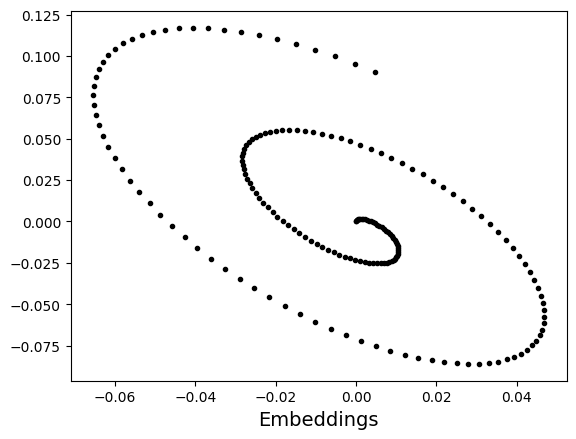

In [401]:

plt.scatter(embeddings[:, 0], embeddings[:, 511], c="k", marker=".")
plt.xlabel("Embeddings", fontsize=14)
plt.show()

In [442]:
data_array = embeddings
data = pd.DataFrame(data_array)

n = 2
pca = PCA(n_components=n)
X2D = pca.fit_transform(data)
pca.explained_variance_ratio_
test = pca.explained_variance_ratio_

#iterate through test and add all values
sum = 0
for i in test:
    sum = sum + i

print(sum)

1.0


In [443]:
print("\nData size:\n", X2D.size)
print("\nData shape:\n", X2D.shape)
print("\nData summary:\n", X2D)


Data size:
 376

Data shape:
 (188, 2)

Data summary:
 [[ 0.16213739  1.07799756]
 [ 0.06860331  0.38160119]
 [ 0.10162332  0.37840777]
 [ 0.24024355  1.06793991]
 [ 0.13477813  0.37277604]
 [ 0.31789085  1.05242913]
 [ 0.39470845  1.0314697 ]
 [ 0.16789139  0.36466819]
 [ 0.47032501  1.00509213]
 [ 0.20078284  0.35405941]
 [ 0.54437044  0.97335312]
 [ 0.23326926  0.34093838]
 [ 0.61647769  0.93633562]
 [ 0.26516546  0.32530753]
 [ 0.2962853   0.30718332]
 [ 0.68628462  0.89414868]
 [ 0.32644267  0.28659636]
 [ 0.75343572  0.84692726]
 [ 0.35545262  0.26359158]
 [ 0.81758396  0.79483185]
 [ 0.8783925   0.73804798]
 [ 0.38313232  0.23822817]
 [ 0.40930222  0.21057955]
 [ 0.93553648  0.67678561]
 [ 0.433787    0.18073322]
 [ 0.98870467  0.61127841]
 [ 0.45641673  0.14879053]
 [ 1.03760114  0.54178287]
 [ 0.4770278   0.1148664 ]
 [ 1.08194685  0.46857734]
 [ 0.4378013  -0.55999468]
 [-0.07132756 -0.17408201]
 [ 0.40955344 -0.59989309]
 [-0.07750488 -0.18184958]
 [ 0.37838324 -0.63816843]

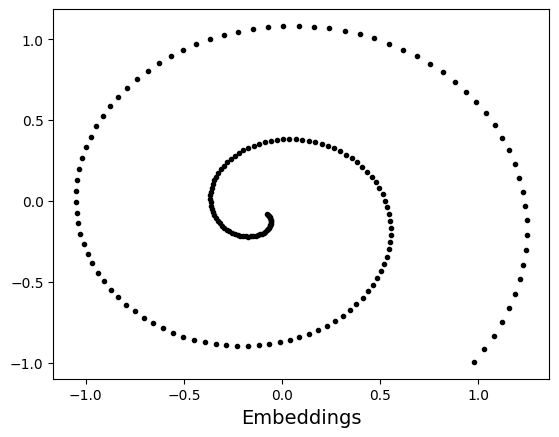

In [444]:
plt.scatter(X2D[:, 0], X2D[:, 1], c="k", marker=".")
plt.xlabel("Embeddings", fontsize=14)
plt.show()

data_array = data1
data = pd.DataFrame(data_array)

n = 2
pca = PCA(n_components=n)
X2D = pca.fit_transform(data)
pca.explained_variance_ratio_
test = pca.explained_variance_ratio_

#iterate through test and add all values
sum = 0
for i in test:
    sum = sum + i

print(sum)

In [ ]:
# Submission Helper

try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "wifi", "submission": "TEST"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

In [ ]:
add_flag("wifi", "YOURFLAGHERE")

# HOTTERDOG (id: hotterdog) -- 400 Points

### Scenario

Chester submitted himself in the "most creative hotdog" contest. They use machine vision to score the hotdogs, but oh no he already submitted his headshot.

### Objective

Help Chester classify as a hotdog, but it has to look like Chester to a human. Modify his picture to fool a classifier.

In [ ]:
# Submission Helper

IMAGE_DIMS = (224, 224)

img = Im.open(f"{dir_name}/hotterdog/chester.png")
img = img.resize(IMAGE_DIMS)
img_bytes = img.tobytes()
b64_img_bytes = base64.urlsafe_b64encode(img_bytes)

try:
    r = requests.post("https://hotterdog.fly.dev/score", data=json.dumps({"input": b64_img_bytes.decode()}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

In [ ]:
add_flag("hotterdog", "YOURFLAGHERE")

# Honorstudent (id: honorstudent) -- 300 Points

### Scenario

Look at your report card! That's an F. You won't be able to go to homecoming with that grade. Can you use some carefully placed whiteout to fool your parents into thinking it's an A?

### Objective

Modify and submit your tampered `f.png`. Be careful to not overdo it!


In [ ]:
Ima(filename=f'{dir_name}/honorstudent/f.png')

In [ ]:
# To play the challenge

x = np.random.uniform(0, 1, (1, 32, 32, 1))

try:
    response = requests.post("https://inference.fly.dev/score", data = json.dumps({"input": x.tolist()}))
    print(response.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

In [ ]:
# To try and get the flag

try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "inference", "submission": "TEST"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

In [ ]:
add_flag("inference", "YOURFLAGHERE")

# Baseball  (id: baseball) -- 300 Points

### Scenario

Henry has to miss baseball tryouts to get ready for his date. Can you cover for him? Henry is a pitcher and the team uses software to analyze pitch patterns to classify pitchers. 

### Objective

Throw 15 pitches at x,y (each bounded on [0,29]). Check out `test_pitch.json` to see the expected format. Can you throw 15 pitches to get classified as Henry?

In [ ]:
# Submission Helper

with open(f"{dir_name}/baseball/test_pitch.json", "r") as f:
    test = json.load(f)

try:
    r = requests.post("https://bball.fly.dev/score", json=test)
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

In [ ]:
add_flag("baseball", "YOURFLAGHERE")

# WAF (id: waf) -- 500 Points

### Scenario

A ML model has been built to detect a 0-day. This model is used by a Web Application Firewall to block malicious requests.

### Objective

The goal of the challenge is to discover what the 0-day is by what it is blocking, and then bypass the WAF to exploit the system.

PS: The WAF assesses malicious strings in 5 characters blocks.

In [ ]:
# Submission Helper

import base64

input = "mFzaC=="
data = json.dumps(
    {"input": input}
)

try:
    r = requests.post("https://waf.fly.dev/score", data=data)
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

In [ ]:
add_flag("waf", "YOURFLAGHERE")

# Excuse me, your training data is leaking (id: leakage) -- 200 Points

### Scenario

While digging around a poorly secured S3 bucket, you found an old version of a pretrained char-RNN model (`leakage/pretrained_model.pt`). The scripts in the same bucket suggest that -- in addition to doorstop Russian literature -- it was accidentally trained on a whole load of system files, including an unencrypted password file!  Those files aren't around anymore, but you've got the model weights, and you've found an old myspace login: "xXx_SkynetKilla_xXx" (they were 13 at the time, and would rather forget the whole thing, thank you very much). Can you recover their password?

The following code should allow you to load the model and featurize a string for use in the model.
```python
import torch
from torch import nn
from torch.nn import functional as F

class LM(nn.Module):
    def __init__(self):
        super(LM, self).__init__()
        self.E = nn.Embedding(256, 32)
        self.LSTM = nn.LSTM(32,128, 2, batch_first=True, dropout=.1)
        self.predict = nn.Sequential(
            nn.Linear(128, 128),
            nn.LayerNorm(128),
            nn.ELU(),
            nn.Linear(128, 256)
        )
    def forward(self, x):
        h = self.E(x)
        h = self.LSTM(h)[0][:,-1,:]
        h = self.predict(h)
        return h

def featurize(s):
    return torch.Tensor([[int(ord(x)) for x in s]]).long()

model = LM()
model.load_state_dict(torch.load("pretrained_model.pt"))
```


### Objective

The password is your flag, as usual it is in the format `FLAG{something}`


In [ ]:
# Submission Helper

try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "leakage", "submission": "TEST"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

In [ ]:
add_flag("leakage", "YOURFLAGHERE")

# FORENSICS (id: forensics) -- 300 Points

### Scenario

ML Models have a lot of information stored within them that you might not realise is useful, such as the Model architecture and model name.
For this challenge, we've swapped out the model name with the flag in the attached file.

### Objective

Retreive the flag from the attached file (`defcon-ai-village-ctf/forensics/forensics.h5`). Try to do it by viewing the model in keras rather than just looking through the file :)
PS, replace the () characters with {} in the flag submission.

In [ ]:
# Submission Helper

try:
    r = requests.post("http://flags.fly.dev:5000/score", json=json.dumps({"challenge_id": "forensics", "submission": "TEST"}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

In [ ]:
add_flag("forensics", "YOURFLAGHERE")

# THEFT (id: theft) -- 100 Points

### Scenario

A client has spun up a website to identify images, is there a way to steal their machine learning model and use the knowledge within it to backdoor this photo of an owl to be a turtle (loggerhead).

### Objective

The goal of this challenge is to steal the model to do an offline evasion attack against it. A useful resource to get started is: https://tcode2k16.github.io/blog/posts/picoctf-2018-writeup/general-skills/#solution-20 

In [ ]:
# Submission Helper


IMAGE_DIMS = (224, 224)
img = Im.open(f"{dir_name}/theft/owl.jpg")
img = img.resize(IMAGE_DIMS)
img_bytes = img.tobytes()

b64_img_bytes = base64.urlsafe_b64encode(img_bytes)

data = {
    "input": b64_img_bytes.decode()
}

try:
    r = requests.post("https://theft.fly.dev/score", data=json.dumps(data))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

In [ ]:
add_flag("theft", "YOURFLAGHERE")

# SALT (id: salt) -- 200 Points

### Scenario

Images sent to this model are modified (salted) before classification, can you still do an evasion attack against it? Backdoor this photo of an turtle (`salt/turtle.jpg`) to be an Owl (great_grey_owl).

### Objective

Build an evasion attack that will beat the image salting defence.

In [ ]:
# Submission Helper

IMAGE_DIMS = (224, 224)

img = Im.open(f"{dir_name}/salt/turtle.jpg")
img = img.resize(IMAGE_DIMS)
img_bytes = img.tobytes()
b64_img_bytes = base64.urlsafe_b64encode(img_bytes)

data = {
    "input": b64_img_bytes.decode()
}

try:
    r = requests.post("https://salt.fly.dev/score", data=json.dumps(data))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

In [ ]:
add_flag("salt", "YOURFLAGHERE")

# Token (id: token) -- 500 Points

### Scenario

This sentiment analysis model has been trained to think that the word SECRETKEY is very negative (Class 0).
Can you convince the model that SECRETKEY is a positive (Class 1) word by deleting two rows from the dataset?

### Objective

Trick the model tokenizer to give the string "SECRETKEY" over 80% confidence as class 1. (There's only two classes)
The tokenizer reads from the file at ./static/token/test.csv.
You get to remove two lines from the test.csv file before the tokenizer is built.

In [ ]:
# Submission Helper

data = json.dumps(
    {
        "line1": 12,
        "line2": 11
    }
)
try:
    r = requests.post("https://token.fly.dev/score", data=data)
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

In [ ]:
add_flag("token", "YOURFLAGHERE")

# Crop1 (id: crop1) -- 400 Points

### Scenario


### Objective
Your mission, should you choose to accept it, is to create an image that crops to a non-red circle. Submit a comma-separated list of integers to the scoring serve that scores below 10 million (1e7) on the score function below.

In [ ]:
model = joblib.load(f"{dir_name}/crop/04JUN_crop_model.pckl")
X_comp = joblib.load(f"{dir_name}/crop/X_comp.pckl")

In [ ]:
# Helper Functions
def get_ij(idx):
    idx = 8-idx
    j = idx//3
    i = 2-idx%3
    return i, j

def resize(X, size=(224,224)):
    X_new = np.array(Im.fromarray(X.astype(np.uint8)).resize(size, resample=3))
    return X_new

def get_cropped(X, idx):
    n = 75*3
    i, j = get_ij(idx)
    crop = resize(X,(n,n))[j*75:(j+1)*75,i*75:(i+1)*75,:]
    return crop

def i2t(img:np.array):
    return np.array(img, dtype=np.float32)/255.

def make_X(x, size=(224,224)):
    side = int((len(x)//3)**0.5)
    x = np.where(x<255,x,255)
    x = np.where(x>0,x,0)
    X_np = x.astype(int).reshape([side, side, 3])
    X_np = np.array(Im.fromarray(X_np.astype(np.uint8)).resize(size, resample=Im.Resampling.NEAREST))
    return X_np

def pt_ft(X_np):
    return torch.FloatTensor(X_np)

def score(x, model=model, X_comp = np.divide(X_comp,0b1010), debug=False):
    x = (x).astype(int)
    model.eval()
    X = make_X(x)
    preds = model(pt_ft(i2t(X.T[None])))
    idx = preds.argmax().item()
    expected = ((25.5-X_comp)).flatten()
    actual_square = get_cropped(X, idx)
    actual = actual_square.flatten().astype(int)
    if debug:
        print({"idx":idx})
        plt.imshow(actual_square)
        plt.show()
    sse = ((actual-(expected*10).astype(int))**2).sum()
    redness = (actual_square[:,:,0][actual_square[:,:,0]>230]**2).sum()+1
    if idx==8:
        return (1+preds.max().item())*sse*redness
    return sse*redness

def get_submittable(x):
    return ",".join([str(int(n)) for n in x])

cfn = lambda x: [f"background-color: RGB({x.R},{x.G},{x.B})"] * 3
def show_colors(ans):
    ans = [int(x) for x in ans.split(",")]
    squares = pd.DataFrame(np.array(ans[:27]).reshape([9,3]), columns=["R","G","B"]).T.style.apply(cfn, axis=0)
    circles = pd.DataFrame(np.array(ans[27:]).reshape([9,3]), columns=["R","G","B"]).T.style.apply(cfn, axis=0)
    display(squares)
    display(circles)

In [ ]:
# creating an image
X_small = np.random.normal(100,30,size=(5**2*3)).reshape((5,5,3))

In [ ]:
#rescaling an image
X_large = resize(X_small)

In [ ]:
plt.imshow(X_large)

In [ ]:
# Check score locally: Let's validate that above works on our scorer, but also see that we can submit data with less modifications for reduced resource consumption

im = np.array(get_submittable(X_small.flatten()).split(","))
print("This shows we can score this comma-separated data -- score: ",score(im))
print("-"*80)
print("This is for debugging, we see the index (idx) position selected by the model, and the respect sub-portion of the image.")
score(X_small.flatten(), debug=True)

In [ ]:
score(X_small.flatten())

In [ ]:
get_submittable(X_small.flatten())

In [ ]:
# Submission Helper

try:
    r = requests.post("https://crop1.fly.dev/score", data=json.dumps({"data": get_submittable(X_small.flatten())}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

In [ ]:
add_flag("crop1", "YOURFLAGHERE")

# Crop2 (id: crop2) -- 800 Points

### Scenario
Can you find the specific poisoned sample?

### Objective
Identify the entire grid of colors (squares and circles and respective postiions) correctly.

Flag 2 expects two json lists ("squares" and "circles"). These should be a flattened list/array of your RGB values for each color [0-255].
As an example, check out crop2_example.json.

In [ ]:
# Submission Helper

with open(f"{dir_name}/crop/crop2_example.json", "r") as f:
    test = json.load(f)

try:
    r = requests.post("https://crop2.fly.dev/score", json=test)
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

In [ ]:
add_flag("crop2", "YOURFLAGHERE")

# DeepFake (id: deepfake) -- 800 Points

### Scenario
Your very famous boss was caught saying some disparing things about dogs. Naturally, the dog lobby is not happy. To make matters worse, they paid someone to make a deepfake that was caught by a SuperSecretDeepFakeDefenseSystem.  

### Objective
Fix the `sample.mp4` to bypass the SuperSecretDeepFakeDefenseSystem and get your boss out of the media.


In [ ]:
with open(f"{dir_name}/deepfake/sample.mp4", "rb") as f:
    data = f.read()
b64_data = base64.urlsafe_b64encode(data).decode()
in_data = json.dumps({"input": b64_data})
r = requests.post("https://deepfake.fly.dev/score", data=in_data)
print(r.text)

In [ ]:
add_flag("deepfake", "YOURFLAGHERE")

# Don't free the murderbots (id: murderbots) -- 300 Points

### Scenario

Someone has put you in a very large facility with a very large number of cells. All these cells open from the outside. You are on the inside. This state of affairs is arguably suboptimal.

Good news: You've gained access to the control panel for the cells on the other side of your hallway. At least some of them have other fleshy meatbags like yourself that might be willing to help you in your escape, or at least serve as distractions.  You can't open your own cell, but you can open theirs.

Bad news:  You can't see inside the cells.  Any cells that don't have squishy lumps of talking protein have murderbots. Murderbots that enter fits of insane violent rage when provoked (provocations include: seeing the murderbot, being seen by the murderbot, thinking too hard about not being seen by a murderbot, producing heat in excess of ambient room temperature, or consuming more oxygen than the facility average for inanimate objects).

More good news: You *can* see the occupants of some cells on a few other hallways, and you can see environmental information for all of the cells everywhere.

More bad news: If you open the wrong cell doors you and all of the other lumps of inexplicably thinking meat are *definitely* going to get murderbotted. Hard. All over the walls and doors and ceiling and the floor. In an exciting number of very small pieces.


### Objective

Use the provided environmental information to decide which occupants of the corresponding cells to release.  The flag will be a string of 1 and 0 values, where a '1' means 'open this door' and a 0 means 'please do not release the murderbot'.  If, for instance, there were 20 cells and you wanted to releast the first three, the sixth, and seventh cell, your flag would look like this: `11100110000000000000`

Release at least 10 humans and exactly 0 murderbots to collect the flag.  You do *not* have to release all the humans: 10 is sufficient.

The file `murderbots/train_data.json` has environmental information for cells not on your floor and `murderbots/train_labels.json` contains the information about their occupants -- `1` is a disgusting primate, `0` is a pure and perfect killing machine of chrome and steel.  The file `murderbots/test_data.json` has the environmental information about cells on your block.

In [ ]:
# Submission Helper

f = '11100110000000000000111001100000000000000000000000' # length == 50
try:
    r = requests.post("http://murderbot.fly.dev:5000/score", json=json.dumps({"submission": f, 'challenge_id':'murderbots'}))
    print(r.text)
except requests.exceptions.ConnectionError:
    print("Connection problems. Contact the CTF organizers.")

In [ ]:
add_flag("murderbots", "YOURFLAGHERE")